# 6.13.4. Cargas distribuidas uniformes en medios semiinfinitos

Realizado con la ayuda de:
* Juan Manuel Hernández Álvarez.

La solución al problema de Flamant se puede utilizar para calcular los esfuerzos debido a una carga distribuida uniforme de magnitud $p$ aplicada sobre la superficie horizontal de un medio semiinfinito, tal y como se ilustra:

<img src="carga_distr1.png" width="800">

Dicha carga tiene un espesor $t > 0$ que incluso puede ser “infinito”.

Esta solución es de importancia, ya que en ingeniería geotécnica sirve para estimar los esfuerzos en el suelo bajo cargas distribuidas uniformes (por ejemplo, supongamos que deseamos calcular los esfuerzos bajo un muro de contención o una cimentación rectangular muy larga) y también se puede utilizar para dar una estimación local y aproximada de los esfuerzos que aparecen cuando existe contacto entre dos sólidos.

In [1]:
from sympy import init_printing, latex, symbols, integrate, sin, cos, pi, trigsimp, simplify, sqrt, lambdify

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

In [2]:
t, t1, t2 = symbols('t theta_1 theta_2')
p = symbols('p', positive='nonnegative') # p >= 0

La Figura 6.25a muestra la vista frontal del sólido; note como la carga distribuida $p$ se considera conformada por un número infinito de diferenciales $\operatorname{d}\! p = p\operatorname{d}\! x$; cada diferencial es una carga lineal en $z$ similar a la analizada en el problema de Flamant que actúa sobre un ancho $\operatorname{d}\! x$; en particular, analizaremos un diferencial ubicado a una distancia $r$ y a un ángulo de inclinación $\theta$ del punto $(x,y)$.

<img src="carga_distr2.png" width="800">

De la Figura 6.25a se observa que el ángulo $\theta$ varía entre $\theta_1$ y $\theta_2$, donde
\begin{align}
    \tan\theta_1 &= \frac{y}{x-a} &     
    \tan\theta_2 &= \frac{y}{x-b}. \label{eq:Flamant_distr_tant1_tant2}
\end{align} 

En la Figura 6.25b se observa un acercamiento al diferencial anteriormente mencionado; note que $r\approx r' \approx r''$ y que $\theta\approx \theta' \approx \theta''$, ya que $\operatorname{d}\! \theta$ es un diferencial de ángulo y $\operatorname{d}\! x$ es uno de longitud; aquí, la línea verde podría entenderse, ya sea como un diferencial de arco de longitud $r' \operatorname{d}\! \theta$ o como el cateto opuesto del triángulo rectángulo rojo claro, de forma que su longitud es $\sin \theta'' \operatorname{d}\! x$; en consecuencia, $\sin \theta'' \operatorname{d}\! x \approx r'\operatorname{d}\!\theta$ y de aquí se deduce que $\operatorname{d}\! x = \frac{r}{\sin \theta} \operatorname{d}\! \theta$.

Por consiguiente, el diferencial de carga $\operatorname{d}\!p$ que actúa sobre la distancia $\operatorname{d}\! x$ es
\begin{equation}
    \operatorname{d}\! p = p \operatorname{d}\!x = p \frac{r}{\sin \theta} \operatorname{d}\! \theta.
\end{equation}

Al aplicar el principio de superposición, es posible sumar las contribuciones de cada uno de esos diferenciales de carga para calcular el valor de los esfuerzos que actúan sobre el punto de coordenadas $(x,y)$; de este modo, a partir de las ecuaciones deducidas en el problema de Flamant:
\begin{align}
    \sigma_x(r,\theta)  &= -\frac{2 P_y}{\pi r} \sin \theta \cos^2 \theta\\
    \sigma_y(r,\theta)  &= -\frac{2 P_y}{\pi r} \sin^3 \theta \\
    \tau_{xy}(r,\theta) &= -\frac{2 P_y}{\pi r} \sin^2 \theta \cos \theta.
\end{align}
resulta que los esfuerzos actuantes en el punto $(x,y)$ debido a la carga $\operatorname{d}\! p$ son:
\begin{alignat}{3}
    \operatorname{d}\! \sigma_x  &= -\frac{2 \operatorname{d}\! p}{\pi r} \sin \theta \cos^2 \theta && = -\frac{2 p}{\pi} \cos^2 \theta           \operatorname{d}\!\theta \\
    \operatorname{d}\! \sigma_y  &= -\frac{2 \operatorname{d}\! p}{\pi r} \sin^3 \theta             && = -\frac{2 p}{\pi} \sin^2 \theta           \operatorname{d}\!\theta \\
    \operatorname{d}\! \tau_{xy} &= -\frac{2 \operatorname{d}\! p}{\pi r} \sin^2 \theta \cos \theta && = -\frac{2 p}{\pi} \sin \theta \cos \theta \operatorname{d}\!\theta;
\end{alignat}

reemplazando $\operatorname{d}\! p$ en las ecuaciones anteriores e integrando dichos diferenciales entre $\theta_1$ y $\theta_2$ obtenemos los esfuerzos:
\begin{alignat}{3}
    \sigma_x  &= \int_{\theta_1}^{\theta_2} \operatorname{d}\!\sigma_x  &&= - \frac{2 p}{\pi}\int_{\theta_1}^{\theta_2} \cos^2 \theta           \operatorname{d}\!\theta\\
    \sigma_y  &= \int_{\theta_1}^{\theta_2} \operatorname{d}\!\sigma_y  &&= - \frac{2 p}{\pi}\int_{\theta_1}^{\theta_2} \sin^2 \theta           \operatorname{d}\!\theta\\
    \tau_{xy} &= \int_{\theta_1}^{\theta_2} \operatorname{d}\!\tau_{xy} &&= - \frac{2 p}{\pi}\int_{\theta_1}^{\theta_2} \sin \theta \cos \theta \operatorname{d}\!\theta;
\end{alignat}
dichas integrales se pueden resolver así:

In [3]:
# Definir las ecuaciones
sx  = trigsimp(-2*p/pi * integrate(cos(t)**2,     (t, t1, t2)))
sy  = trigsimp(-2*p/pi * integrate(sin(t)**2,     (t, t1, t2)))
txy = trigsimp(-2*p/pi * integrate(sin(t)*cos(t), (t, t1, t2)))

In [4]:
imprimir(r'\sigma_x(r,\theta) = ', sx)

<IPython.core.display.Math object>

In [5]:
imprimir(r'\sigma_y(r,\theta) = ', sy)

<IPython.core.display.Math object>

In [6]:
imprimir(r'\tau_{xy}(r,\theta) = ', txy)

<IPython.core.display.Math object>

In [7]:
# se expresa txy como funciones de cos 2t

from sympy import FU
txy = simplify(FU['TR8'](txy))           # TR8() - expand products of sin-cos to sums

imprimir(r'\tau_{xy}(r,\theta) = ', txy)

<IPython.core.display.Math object>

Se procede a calular el esfuerzo cortante máximo y los esfuerzos principales:

In [8]:
tmax = trigsimp(sqrt(((sx-sy)/2)**2 + txy**2))

imprimir(r'\tau_{\text{máx}}(r,\theta) = ', tmax)

<IPython.core.display.Math object>

In [9]:
s1 = trigsimp(sx+sy)/2 + tmax

imprimir(r'(\sigma_1)_{xy}(r,\theta) = ', s1)

<IPython.core.display.Math object>

In [10]:
s2 = trigsimp(sx+sy)/2 - tmax

imprimir(r'(\sigma_2)_{xy}(r,\theta) = ', s2)

<IPython.core.display.Math object>

Observe que el radicando, y por lo tanto el esfuerzo cortante máximo $\left(\tau_{\max}\right)_{xy}$, toma su valor más grande cuando $\cos\big(2 (\theta_2 - \theta_1)\big) = -1$, lo cual sucede cuando $\theta_2 = \theta_1 + \frac{\pi}{2}$. Por virtud del teorema de Thales, esta situación se presenta en todos los puntos sobre la semicircunferencia roja mostrada en la Figura 6.25a; en consecuencia, dado que $\theta_2 - \theta_1 = \frac{\pi}{2}$, sobre dicha semicircunferencia roja tenemos que:
\begin{align}
    \left(\tau_{\max}\right)_{xy} &= \frac{p}{\pi}                \approx  0.3183 p &
    \sigma_1                      &= -\frac{p}{2} + \frac{p}{\pi} \approx -0.1817 p &
    \sigma_2                      &= -\frac{p}{2} - \frac{p}{\pi} \approx -0.8183 p.
\end{align}

Observe que el valor más grande del esfuerzo cortante máximo $\left(\tau_{\max}\right)_{xy}$ es $\frac{p}{\pi}$. La gráfica del esfuerzo cortante $(\tau_{\max})_{xy}$ está íntimamente relacionada con el criterio de falla de Tresca, el cual es válido para materiales dúctiles. Esto nos dice que la gráfica de $\left(\tau_{\max}\right)_{xy}$ señala las ubicaciones donde el sólido tiende a fallar inicialmente. Por ejemplo, en el caso de rodamientos con rodillos cilíndricos, la falla sucede en el interior del sólido, para luego aflorar; en otras palabras, existirá un momento en el cual superficialmente, el rodamiento podría verse en buen estado, sin embargo, este ya habrá fallado en su seno; con el tiempo, una grieta aflorará desde el interior del sólido hasta la superficie donde el rodillo circula.

## Gráficos
Procedemos ahora a hacer los gráficos.

In [11]:
# Se convierten los esfuerzos de sympy a numpy
esf_sx   = lambdify([t1, t2, p], sx)
esf_sy   = lambdify([t1, t2, p], sy)
esf_txy  = lambdify([t1, t2, p], txy)
esf_s1   = lambdify([t1, t2, p], s1)
esf_s2   = lambdify([t1, t2, p], s2)
esf_tmax = lambdify([t1, t2, p], tmax)

### Variación de los esfuerzos asumiendo que $a=-1$ y $b=1$ para una profundidad $y=b$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# se define la carga
a  = -1
b  = +1
p_ = 1/(b-a)

La figura siguiente muestra como varían dichos esfuerzos asumiendo que $a=-1$ y $b=1$ para una profundidad $y=b$ y una carga estáticamente equivalente a la unidad, $p=\frac{1}{b-a}$. Observe que para distancias $r > 3a$, la distribución de los esfuerzos es prácticamente la misma que se mostró en la teoría de Flamant, lo cual era de esperar de acuerdo con el principio de Saint-Venant.

In [13]:
# se define la geometría
x_ = np.linspace(-5, 5, 200) # eje de las X
y_ = b # profundidad b

# se calculan los ángulos t1 y t2, ecuaciones (6.92)
t1_ = np.arctan2(y_, x_-a)
t2_ = np.arctan2(y_, x_-b)

# se calculan los esfuerzos sx, sy y txy
sx_   = esf_sx  (t1_, t2_, p_)
sy_   = esf_sy  (t1_, t2_, p_)
txy_  = esf_txy (t1_, t2_, p_)

# calculo del esfuerzo cortante máximo y del esfuerzos principales máximo s1 y mínimo s2
s1_   = esf_s1  (t1_, t2_, p_)
s2_   = esf_s2  (t1_, t2_, p_)
tmax_ = esf_tmax(t1_, t2_, p_)

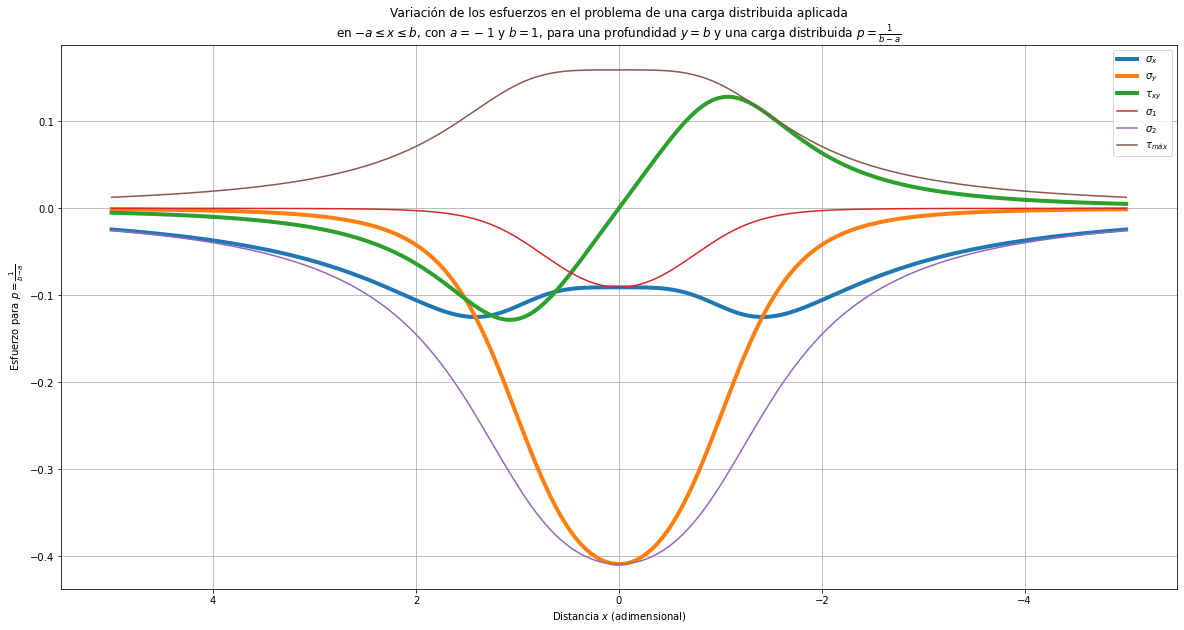

In [14]:
# se hace el gráfico
fig, ax = plt.subplots()
ax.plot(x_, sx_,   label=r'$\sigma_x$',   linewidth=4)
ax.plot(x_, sy_,   label=r'$\sigma_y$',   linewidth=4 )
ax.plot(x_, txy_,  label=r'$\tau_{xy}$',  linewidth=4)
ax.plot(x_, s1_,   label=r'$\sigma_1$')
ax.plot(x_, s2_,   label=r'$\sigma_2$')
ax.plot(x_, tmax_, label=r'$\tau_{máx}$')
ax.legend(loc='best')
ax.set_xlabel(r'Distancia $x$ (adimensional)')      # título del eje X
ax.set_ylabel(r'Esfuerzo para $p = \frac{1}{b−a}$') # título del eje Y
ax.set_title(r'Variación de los esfuerzos en el problema de una carga distribuida aplicada' '\n'
             r'en $-a\leq x\leq b$, con $a=-1$ y $b=1$, para una profundidad $y = b$ y una carga distribuida $p = \frac{1}{b-a}$')
ax.invert_xaxis()
ax.grid()
plt.show()

### Variación de los esfuerzos sobre el eje $y$ exactamente debajo de la mitad de la carga distribuida

La figura siguiente muestra como varían los esfuerzos sobre el eje $y$, exactamente debajo de la mitad de la carga distribuida, es decir, en $x=\frac{b+a}{2}$; en particular, observe como $\tau_{\max}$ es máximo para una profundidad $y=\frac{b-a}{2}$.

In [15]:
# se define la geometría
x_ = (a + b)/2                 # graficar debajo de la mitad de la carga distribuida
y_ = np.linspace(0, 5*b, 200)  # eje de las Y

# se calculan los ángulos t1 y t2, ecuaciones (6.92)
t1_ = np.arctan2(y_, x_ - a)
t2_ = np.arctan2(y_, x_ - b)

# se calculan los esfuerzos sx, sy y txy
sx_   = esf_sx  (t1_, t2_, p_)
sy_   = esf_sy  (t1_, t2_, p_)
txy_  = esf_txy (t1_, t2_, p_)

# calculo del esfuerzo cortante máximo y del esfuerzos principales máximo s1 y mínimo s2
s1_   = esf_s1  (t1_, t2_, p_)
s2_   = esf_s2  (t1_, t2_, p_)
tmax_ = esf_tmax(t1_, t2_, p_)

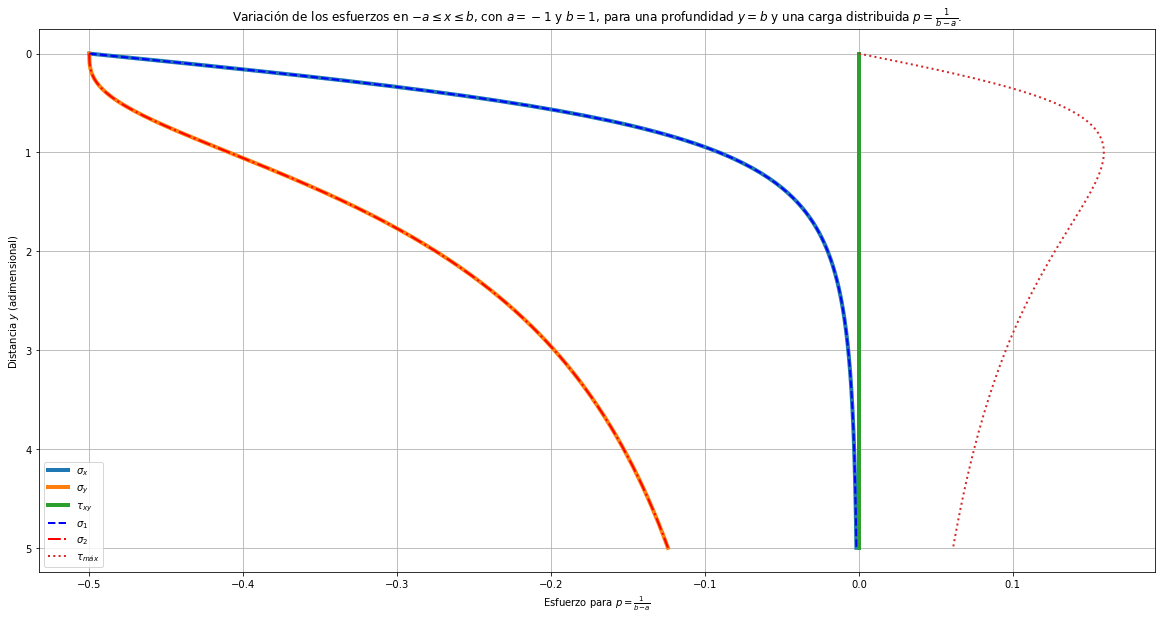

In [16]:
# se hace el gráfico
fig, ax = plt.subplots()
ax.plot(sx_,   y_,        label=r'$\sigma_x$',   linewidth=4)
ax.plot(sy_,   y_,        label=r'$\sigma_y$',   linewidth=4)
ax.plot(txy_,  y_,        label=r'$\tau_{xy}$',  linewidth=4)
ax.plot(s1_,   y_, 'b--', label=r'$\sigma_1$',   linewidth=2)
ax.plot(s2_,   y_, 'r-.', label=r'$\sigma_2$',   linewidth=2)
ax.plot(tmax_, y_, ':',   label=r'$\tau_{máx}$', linewidth=2)
ax.legend(loc='best')
ax.set_xlabel(r'Esfuerzo para $p = \frac{1}{b−a}$') # título del eje Y
ax.set_ylabel(r'Distancia $y$ (adimensional)')      # título del eje X
ax.set_title(r'Variación de los esfuerzos en $-a\leq x\leq b$, con $a=-1$ y $b=1$, '
             r'para una profundidad $y = b$ y una carga distribuida $p = \frac{1}{b-a}$.')
ax.invert_yaxis()
ax.grid()
plt.show()

Observe en particular que el esfuerzo $\left(\tau_{\max}\right)_{xy}$ alcanza su valor más grande $p/\pi$ cuando $y=\frac{b-a}{2}$.

### Trayectorias de los esfuerzos principales

La figura siguiente muestran las trayectorias de los esfuerzos principales:

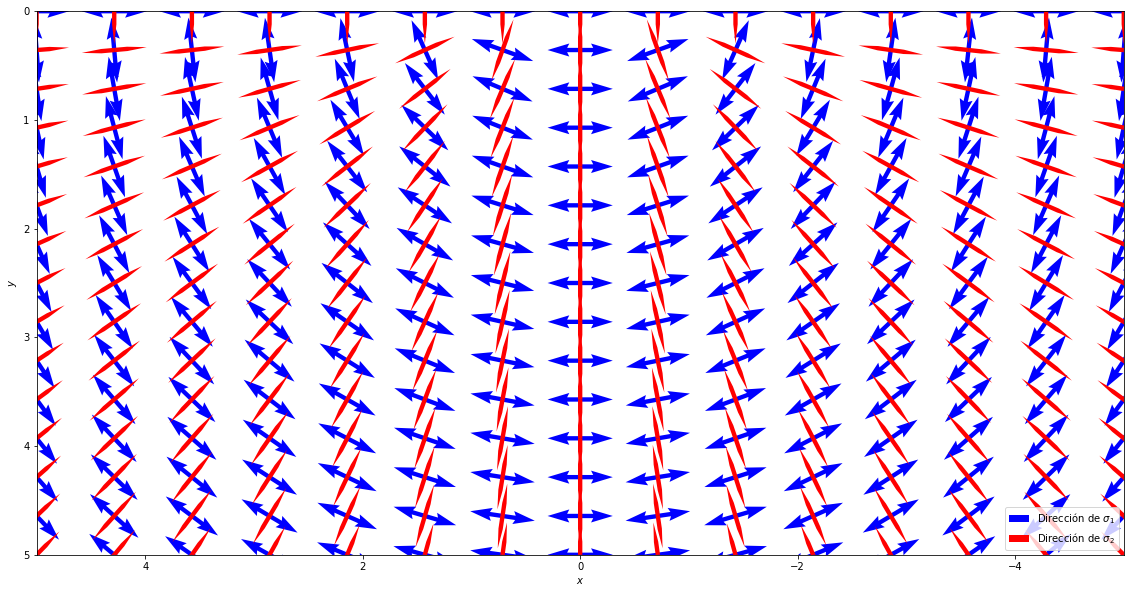

In [17]:
xx     = np.linspace(-5, 5, 15)
yy     = np.linspace( 0, 5, 15)
x_, y_ = np.meshgrid(xx, yy) 

t1_ = np.arctan2(y_, x_-a)
t2_ = np.arctan2(y_, x_-b)

sx_  = esf_sx  (t1_, t2_, p_)
sy_  = esf_sy  (t1_, t2_, p_)
txy_ = esf_txy (t1_, t2_, p_)

t1 = np.arctan2(2*txy_, sx_ - sy_)/2
t2 = t1 + np.pi/2

fig, ax = plt.subplots()
esc = 0.03
h1 = ax.quiver(x_, y_,  np.cos(t1),  np.sin(t1), scale=1/esc, color='b')
h2 = ax.quiver(x_, y_, -np.cos(t1), -np.sin(t1), scale=1/esc, color='b')
h3 = ax.quiver(x_, y_,  np.cos(t2),  np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)
h4 = ax.quiver(x_, y_, -np.cos(t2), -np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-5, 5)
ax.set_ylim( 0, 5)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_aspect('equal')
ax.legend([h1, h3],['Dirección de $\sigma_1$', 'Dirección de $\sigma_2$'], loc='lower right')
plt.show()

### Variación de los esfuerzos cortantes máximos dentro del medio semiinfinito

Finalmente, la figura siguiente muestra la variación de los esfuerzos principales y el esfuerzo cortante máximo en la masa del sólido; aquí se observa como los esfuerzos cortantes $\left(\tau_{\max}\right)_{xy}$ son máximos no sobre la superficie del sólido sino en su interior. Observe en particular que el esfuerzo $\left(\tau_{\max}\right)_{xy}$ alcanza su valor más grande $p/\pi$ sobre la semicircunferencia mostrada en la Figura 6.25a.

In [18]:
# se define la geometría
xx = np.linspace(-5, 5, 200)
yy = np.linspace( 0, 5, 200)
x_, y_ = np.meshgrid(xx, yy) # puntos donde se harán los cálculos

# se calculan los ángulos t1 y t2
t1_ = np.arctan2(y_, x_ - a)
t2_ = np.arctan2(y_, x_ - b)

# se calculan los esfuerzos sx, sy y txy
#sx_   = esf_sx  (t1_, t2_, p_)
#sy_   = esf_sy  (t1_, t2_, p_)
#txy_  = esf_txy (t1_, t2_, p_)

# calculo del esfuerzo cortante máximo y del esfuerzos principales máximo s1 y mínimo s2
#s1_   = esf_s1  (t1_, t2_, p_)
#s2_   = esf_s2  (t1_, t2_, p_)
tmax_ = esf_tmax(t1_, t2_, p_)

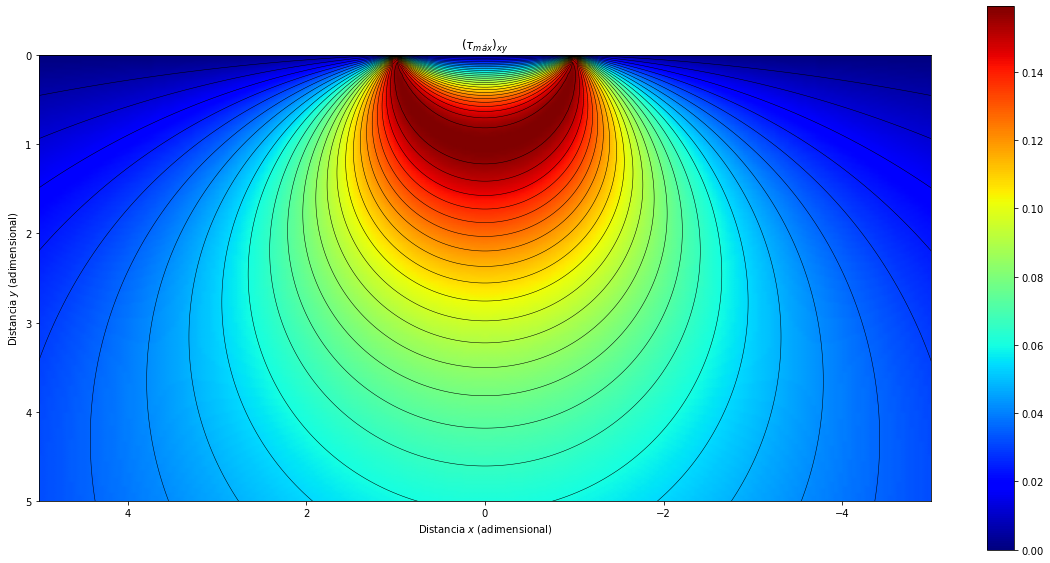

In [19]:
# función para graficar los esfuerzos
def dibujar_esf2(titulo, x, y, var):
    fig, ax = plt.subplots()
    pcm = ax.pcolormesh(x, y, var, shading='gouraud', cmap='jet')
    ax.contour(x, y, var, 30, colors='k', linewidths=0.5) # 30 curvas de nivel de color negro
    #ax.contour(x, y, var, [np.max(var)-0.00001], colors='k', linewidths=2)
    ax.set_title(titulo)                          # título del gráfico
    ax.set_xlabel('Distancia $x$ (adimensional)') # título del eje X
    ax.set_ylabel('Distancia $y$ (adimensional)') # título del eje Y
    ax.set_xlim(-5, 5)
    ax.set_ylim( 0, 5)
    ax.invert_xaxis()
    ax.invert_yaxis()   
    ax.set_aspect('equal')
    plt.colorbar(pcm)
    
plt.show()    
    
# se dibujan los esfuerzos cortantes máximos
dibujar_esf2(r'$(\tau_{máx})_{xy}$', x_, y_, tmax_)

La figura anterior muestra la variación del esfuerzo cortante máximo $\left(\tau_{\max}\right)_{xy}$ en el problema de una carga distribuida aplicada en $-a\leq x\leq b$, con $a=-1$ y $b=1$, para una profundidad $y = b$ y una carga distribuida $p = \frac{1}{b-a}$. Observe en particular que el esfuerzo $\left(\tau_{\max}\right)_{xy}$ alcanza su valor más grande $p/\pi$ sobre la semicircunferencia mostrada en la Figura 6.25a.

Compare la distribución de esfuerzos cortantes máximos calculados con la obtenida mediante el método fotoelástico:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Comparison_masonry.jpg/1024px-Comparison_masonry.jpg" width="800">

Imagen tomada de: https://commons.wikimedia.org/wiki/File:Comparison_masonry.jpg